<a href="https://colab.research.google.com/github/Whyugstiaan/tugas-ml/blob/main/UAS_Dycywardoyo_2211010051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. LOAD & EKSPLORASI DATA

In [33]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
# Load dataset CSV
# Ganti path sesuai lokasi file di Google Colab
df = pd.read_csv('/content/iris.csv')

# Tampilkan 5 data teratas
df.head(50)


,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Menampilkan Jumlah Data & Fitur

In [35]:
print("Jumlah data :", df.shape[0])
print("Jumlah fitur :", df.shape[1] - 1)  # dikurangi target

Jumlah data : 150
Jumlah fitur : 4


Menampilkan Nama Fitur

In [36]:
print("Nama fitur:")
for col in df.columns:
    print("-", col)

Nama fitur:
- 150
- 4
- setosa
- versicolor
- virginica


Distribusi Kelas Target

In [37]:
print("Distribusi kelas target:")
print(df.iloc[:, -1].value_counts())


Distribusi kelas target:
virginica
0    50
1    50
2    50
Name: count, dtype: int64


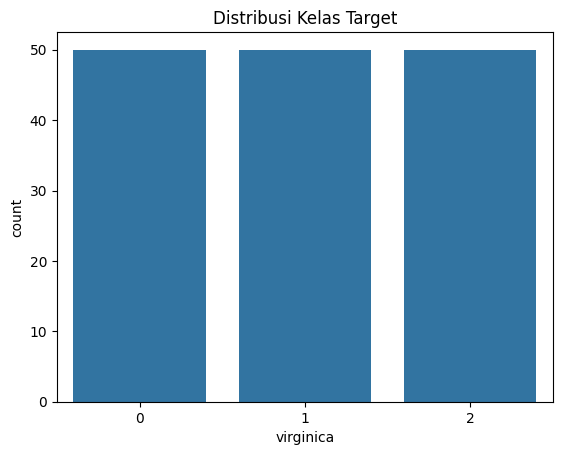

In [38]:
# Visualisasi distribusi kelas
sns.countplot(x=df.iloc[:, -1])
plt.title("Distribusi Kelas Target")
plt.show()


##2. PREPROCESSING

Memisahkan Fitur dan Target

In [39]:
X = df.iloc[:, :-1]  # fitur
y = df.iloc[:, -1]   # target


Membagi Data Training (70%) & Testing (30%)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Data training :", X_train.shape)
print("Data testing  :", X_test.shape)


Data training : (105, 4)
Data testing  : (45, 4)


Feature Scaling (StandardScaler)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##3. KNN (k = 5)

Implementasi & Training Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Prediksi Data Testing

In [43]:
y_pred = knn.predict(X_test_scaled)

y_pred

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

Evaluasi Model

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)


Accuracy : 0.9111111111111111
Precision: 0.9298245614035088
Recall   : 0.9111111111111111
F1-score : 0.9095022624434389


Classification Report

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

